<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Juan Pablo Blanco Lemus, Dafne Tamayo León

**Fecha:** 15 de marzo del 2025.

**Expediente** : 744534.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea-4-3.git

# Tarea 4: Clase 11

## Enunciado de tarea (Transcibirlo)

### Ejercicio 1: (enunciado) Transcribirlo
> Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

> - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.
> - https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

Código de solución estudiante 1

In [17]:
# Código de solución estudiante 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

df = pd.read_csv('Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Ok, vemos que tenemos que tratar un poco los datos en cuestiones de categorías que se tendrán que encodear, pero en general los datos se ven bien.
Nuestra variable objetivo es `price`, las variables categóricas son `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea` y `furnishingstatus`. De estas variables, `furnishingstatus` es la que tiene más categorías, por lo que se tendrá que hacer un encodeo especial. Las otras son binarias, por lo que se les puede aplicar un `LabelEncoder`.

In [18]:
from sklearn.preprocessing import LabelEncoder

binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

le = LabelEncoder()

for var in binary_vars:
    df[var] = le.fit_transform(df[var])

print("Variables binarias encodeadas:")
df[binary_vars].head()


Variables binarias encodeadas:


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


Ahora encodeamos la variable `furnishingstatus` con un `OneHotEncoder`.

In [19]:
df.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['furnishingstatus'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


Bien, ya tenemos nuestros datos encodeados. Ahora vamos a dividir nuestros datos en `X` y `y`.

In [22]:
target_column = 'price'
feature_column = df.columns.drop(target_column)

In [23]:
X = df[feature_column].values
y = df[target_column].values

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (545, 14)
y shape: (545,)


Bien, ahora dividimos nuestro datos en conjuntos de entrenamiento y prueba. Utilizaremos un 20% de los datos para prueba.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 14)
y_train shape: (436,)
X_test shape: (109, 14)
y_test shape: (109,)


Ahora pasemos a normalizar los datos para que el modelo se entrene de forma eficiente y estable. Utilizaremos un `StandardScaler` para esto, que lo que hace es restar la media y dividir por la desviación estándar.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Primeras 5 filas de X_train escalado:")
X_trained_scaled[:5]

Primeras 5 filas de X_train escalado:


array([[ 0.38416819,  0.05527092,  1.53917323,  2.58764353,  0.40715525,
        -0.46677307, -0.74642003, -0.23052136,  1.50124327,  0.36795665,
        -0.55262032,  1.71111891, -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, -0.91249891,  0.40715525,
        -0.46677307,  1.33972825, -0.23052136,  1.50124327,  2.70998729,
        -0.55262032, -0.58441292,  1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , -0.91249891,  0.40715525,
        -0.46677307,  1.33972825, -0.23052136,  1.50124327,  1.53897197,
        -0.55262032,  1.71111891, -0.870669  , -0.67690027],
       [-1.15549214,  0.05527092, -0.5579503 ,  0.25421524,  0.40715525,
        -0.46677307,  1.33972825, -0.23052136, -0.66611456, -0.80305867,
         1.80956067, -0.58441292, -0.870669  ,  1.47732249],
       [-0.63773026,  0.05527092, -0.5579503 ,  0.25421524,  0.40715525,
        -0.46677307, -0.74642003, -0.23052136, -0.66611456, -0.80305867,
        -0.55262032, -0.58

Vamos a aplicar un Reshape a los datos para que tengan la forma que espera una CNN.
Las redes convolucionales 1D esperan que los datos de entrada tengan la forma `(n_samples, n_timesteps, n_features)`. En nuestro caso, cada muestra es un vector de características (n_features), y lo trataremos como una secuencia de n_features con 1 canal.

In [27]:
# Primero obtenemos el número de características (n_features)
n_features = X_train.shape[1]

# Ahora hacemos un reshape de los datos
X_train_cnn = X_trained_scaled.reshape(X_trained_scaled.shape[0], n_features, 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], n_features, 1)

print("Nueva forma de X_train para CNN:", X_train_cnn.shape)
print("Nueva forma de X_test para CNN:", X_test_cnn.shape)

Nueva forma de X_train para CNN: (436, 14, 1)
Nueva forma de X_test para CNN: (109, 14, 1)


Explicando un poco más, lo que hicimos fue reestructurar el array para que tenga tres dimensiones:
* __Dimensión 1__: Número de muestras.
* __Dimensión 2__: Número de características.
* __Dimensión 3__: Número de canales.

#### Arquitecura de la CNN

Vamos a construir un modelo CNN para regresión. La arquitectura que utilizaremos será la siguiente:
+ __Capa Conv1D__: Extrae características de la secuencia.
+ __Capa MaxPooling1D__: Reduce la dimensionalidad de las características.
+ __Otra capa Conv1D y Pooling__: Para capturar patrones más complejos.
+ __Capa Flatten__: Para convertir las características en un vector.
+ __Capa Dense__: Con una capa oculta intermedia y la capa de salida final para la predicción del precio.

In [28]:
model_cnn = keras.models.Sequential([
    # Primera capa convolucional: 32 filtros, kernel_size=2, función de activación ReLU
    keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_features, 1)),

    # Capa de MaxPooling para reducir la dimensionalidad
    keras.layers.MaxPooling1D(pool_size=2),

    # Segunda capa convolucional: 64 filtros, kernel_size=2, función de activación ReLU
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),

    # Otra capa de MaxPooling
    keras.layers.MaxPooling1D(pool_size=2),

    # Capa Flatten para convertir las características en un vector
    keras.layers.Flatten(),

    # Capa Dense con 50 neuronas y función de activación ReLU
    keras.layers.Dense(50, activation='relu'),

    # Capa de salida con 1 neurona para regresión, sin función de activación.
    keras.layers.Dense(1)
])

model_cnn.summary()

/Users/juanpabloblancolemus/miniconda3/envs/tarea-4-ejercicio-cnn-tarea-4-3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 0 (0.00 B)

Compilemos el modelo y entrenamos la CNN.

In [29]:
model_cnn.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [30]:
history_cnn = model_cnn.fit(X_train_cnn, y_train,
                            epochs=100,            # Número de épocas
                            batch_size=32,         # Tamaño del batch para cada actualización
                            validation_split=0.2,  # Reserva el 20% del entrenamiento para validación
                            verbose=1)



Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24807334739968.0000 - mae: 4685945.0000 - val_loss: 24781590102016.0000 - val_mae: 4623896.5000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25973909094400.0000 - mae: 4794838.0000 - val_loss: 24781564936192.0000 - val_mae: 4623894.0000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24745215000576.0000 - mae: 4661619.0000 - val_loss: 24781512507392.0000 - val_mae: 4623888.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26083372040192.0000 - mae: 4789986.5000 - val_loss: 24781405552640.0000 - val_mae: 4623877.0000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25267500220416.0000 - mae: 4731480.5000 - val_loss: 24781204226048.0000 - val_mae: 4623856.0000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25389470580736.0000 - mae: 4705197.5000 - val_loss: 24780847710208.0000 - val_mae: 4623818.5000
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24756128579

In [36]:
print("Claves del historial:", history_cnn.history.keys())

Claves del historial: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


A ojo de buen cubero podemos ver que el modelo está aprendiendo, ya que tanto la pérdida como el MAE están disminuyendo.
En la época inicial la pérdida y el MAE son altos, pero conforme avanzan las épocas, estos valores disminuyen.

Ahora, dado que el precio de las viviendas en el dataset tienen valores muy altos, es natural que tanto la pérdida como el MAE sean altos. Para tener una idea más clara de cómo está aprendiendo el modelo, vamos a graficar la pérdida y el MAE.

Claves del historial: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


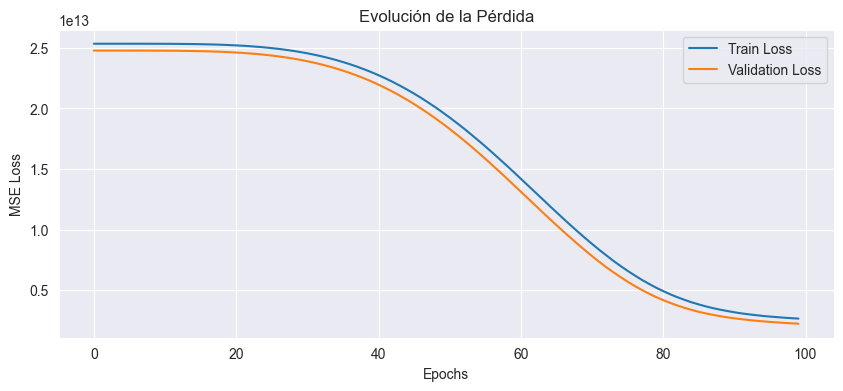

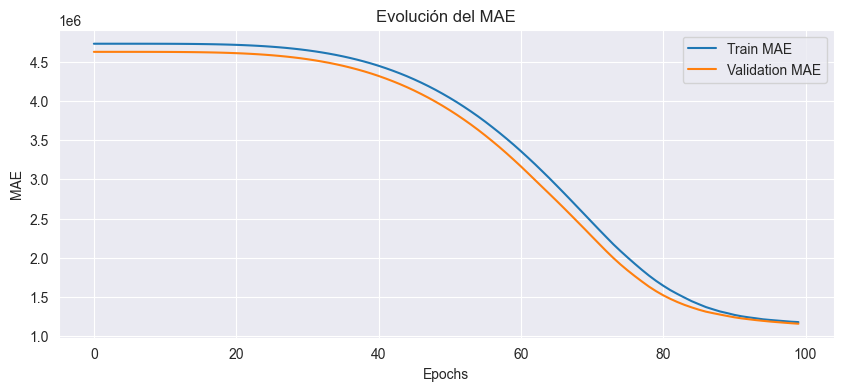

In [31]:
plt.figure(figsize=(10,4))
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.show()

# También se puede graficar el MAE:
plt.figure(figsize=(10,4))
plt.plot(history_cnn.history['mae'], label='Train MAE')
plt.plot(history_cnn.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Evolución del MAE')
plt.legend()
plt.show()


El modelo está aprendiendo de forma estable y no parece haber sobreajuste, ya que la pérdida y el MAE de validación siguen una tendencia similar a la de entrenamiento. Vemos que al final, las curvas parecen ir convergiendo lo que indica que el modelo se acerca a un punto de equilibrio. Sin embargo, podríamos aumentar el número de épocas para ver si el modelo sigue mejorando. Por ahora lo dejaremos así y evaluaremos el modelo con los datos de prueba.

In [37]:
test_loss, test_mae = model_cnn.evaluate(X_test_cnn, y_test)

print("MSE en datos de prueba:", test_loss)
print("MAE en datos de prueba:", test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4706338340864.0000 - mae: 1579241.8750
MSE en datos de prueba: 4503692115968.0
MAE en datos de prueba: 1547475.375


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


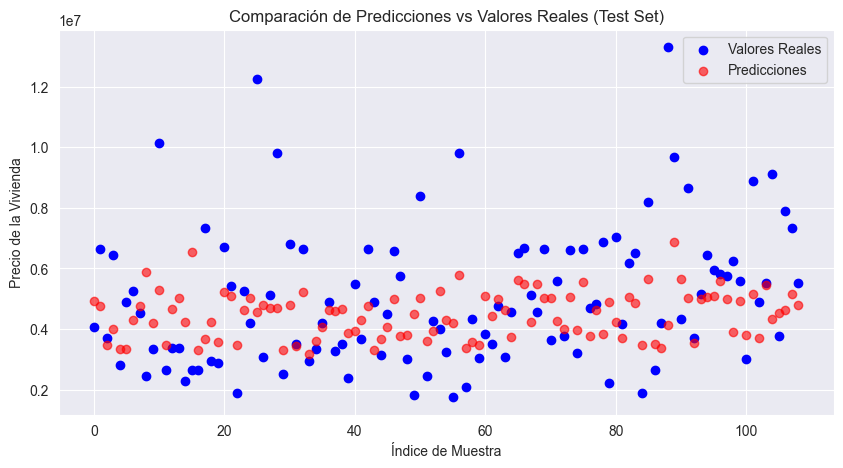

In [38]:
y_pred = model_cnn.predict(X_test_cnn)

# Graficar la comparación: Predicciones vs Valores Reales
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, label='Valores Reales', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicciones', color='red', alpha=0.6)
plt.xlabel('Índice de Muestra')
plt.ylabel('Precio de la Vivienda')
plt.title('Comparación de Predicciones vs Valores Reales (Test Set)')
plt.legend()
plt.show()


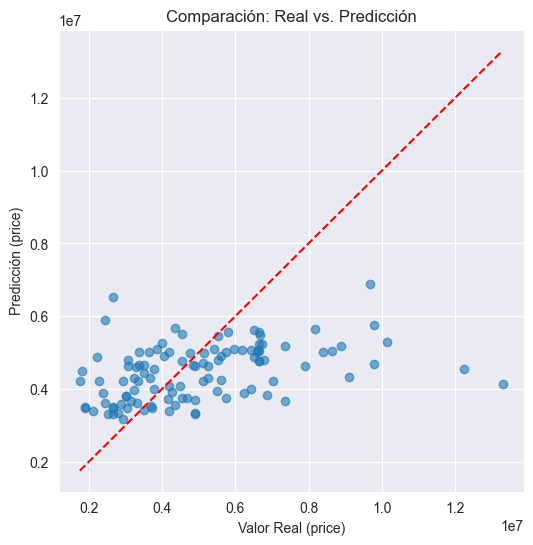

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.xlabel('Valor Real (price)')
plt.ylabel('Predicción (price)')
plt.title('Comparación: Real vs. Predicción')
plt.show()


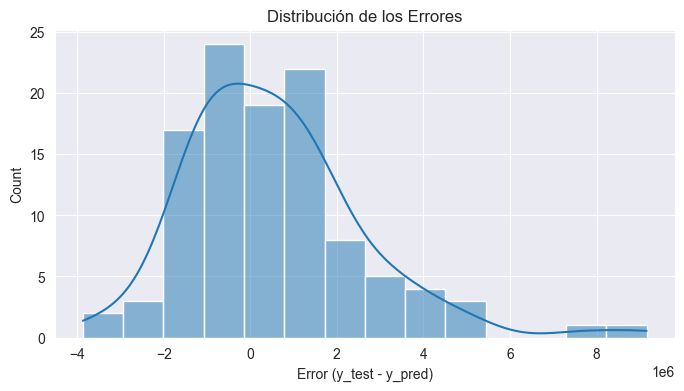

In [40]:
residuals = y_test - y_pred.reshape(-1)
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.xlabel('Error (y_test - y_pred)')
plt.title('Distribución de los Errores')
plt.show()

Pues vemos que en efecto el modelo está aprendiendo, sin embargo, tanto la pérdida como el MAE son altos. El MAE ronda en los 1.5 millones, mientras que los precios de las casas están en el rango de los 10 millones. Esto implica que, en promedio, la red se equivoca el 15% del precio, lo cual creo que es demasiado alto para este caso. Vamos a cambiar la arquitectura de la red y ver si podemos mejorar el desempeño.

#### Arquitectura de la CNN 2

In [46]:
# Segunda versión de la arquitectura CNN (modelo_v2) con padding='same'
model_cnn_v2 = keras.Sequential([
    # Primera capa convolucional: 64 filtros, kernel_size=2, padding same para preservar la dimensión
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',
                        input_shape=(n_features, 1)),
    keras.layers.MaxPooling1D(pool_size=2),

    # Segunda capa convolucional: 128 filtros, kernel_size=2, padding same
    keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2),

    # Tercera capa convolucional: 128 filtros, kernel_size=2, padding same
    keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2),

    # Aplanar la salida
    keras.layers.Flatten(),

    # Capas densas para aumentar la capacidad de modelado
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),

    # Capa de salida (para regresión, una neurona sin activación)
    keras.layers.Dense(1)
])

/Users/juanpabloblancolemus/miniconda3/envs/tarea-4-ejercicio-cnn-tarea-4-3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Mostrar el resumen del nuevo modelo
model_cnn_v2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 7, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 3, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,601 (264.07 KB)

 Trainable params: 67,601 (264.07 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compilamos el nuevo modelo
model_cnn_v2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:
history_cnn_v2 = model_cnn_v2.fit(
    X_train_cnn, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 24945136500736.0000 - mae: 4685002.5000 - val_loss: 24781571227648.0000 - val_mae: 4623894.5000
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26223608594432.0000 - mae: 4791450.5000 - val_loss: 24781336346624.0000 - val_mae: 4623870.5000
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24899424878592.0000 - mae: 4679554.0000 - val_loss: 24780050792448.0000 - val_mae: 4623740.5000
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25798926925824.0000 - mae: 4805028.5000 - val_loss: 24774619168768.0000 - val_mae: 4623187.5000
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24663828725760.0000 - mae: 4699313.0000 - val_loss: 24755652526080.0000 - val_mae: 4621254.0000
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24676948508672.0000 - mae: 4686875.0000 - val_loss: 24699134279680.0000 - val_mae: 4615477.0000
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26924151734

In [50]:
test_loss, test_mae = model_cnn_v2.evaluate(X_test_cnn, y_test, verbose=0)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)


Test MSE: 2689078132736.0
Test MAE: 1197447.0


In [51]:
# Generar las predicciones del modelo
y_pred = model_cnn_v2.predict(X_test_cnn)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


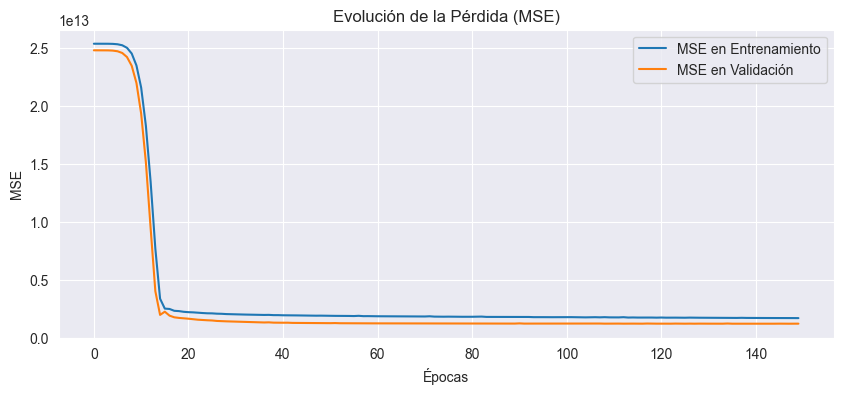

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history_cnn_v2.history['loss'], label='MSE en Entrenamiento')
plt.plot(history_cnn_v2.history['val_loss'], label='MSE en Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Evolución de la Pérdida (MSE)')
plt.legend()
plt.show()


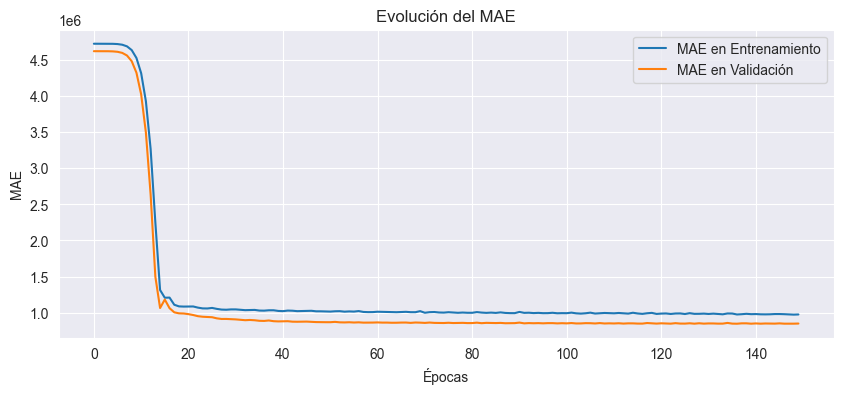

In [57]:
plt.figure(figsize=(10,4))
plt.plot(history_cnn_v2.history['mae'], label='MAE en Entrenamiento')
plt.plot(history_cnn_v2.history['val_mae'], label='MAE en Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Evolución del MAE')
plt.legend()
plt.show()


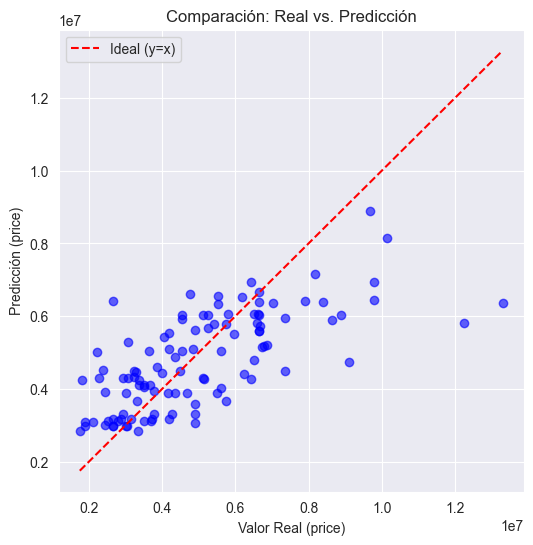

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal (y=x)')
plt.xlabel('Valor Real (price)')
plt.ylabel('Predicción (price)')
plt.title('Comparación: Real vs. Predicción')
plt.legend()
plt.show()


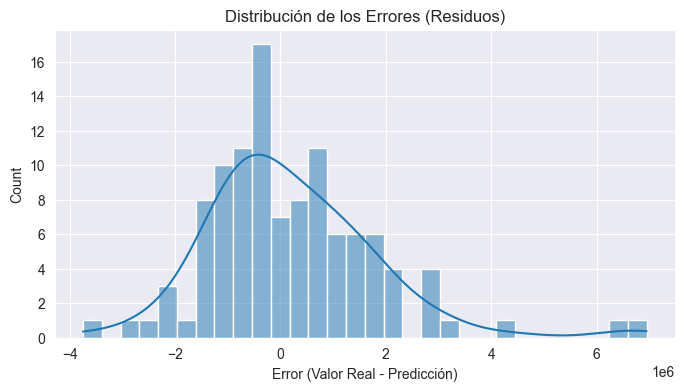

In [53]:
import seaborn as sns

# Calcular los residuos (error) para cada muestra
residuals = y_test - y_pred.reshape(-1)

plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Error (Valor Real - Predicción)')
plt.title('Distribución de los Errores (Residuos)')
plt.show()


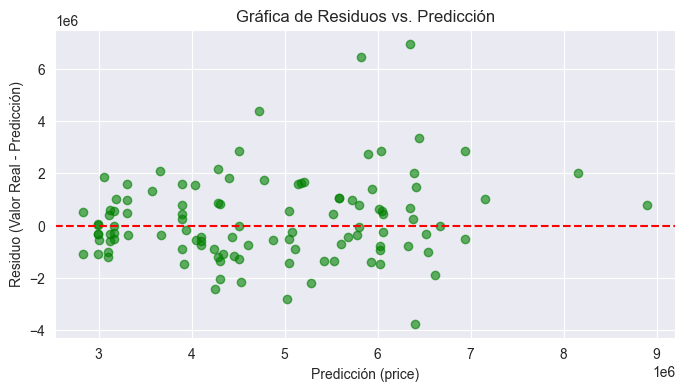

In [54]:
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicción (price)')
plt.ylabel('Residuo (Valor Real - Predicción)')
plt.title('Gráfica de Residuos vs. Predicción')
plt.show()


### Conclusiones

+ Aprende rápido y no sobreajusta: Las curvas de entrenamiento y validación son muy similares.
+ Aún subestima los precios altos: Lo vemos en la gráfica Real vs. Predicción y en la distribución de errores.
+ Mantiene un error promedio (MAE) de alrededor de 1 millón.

Podríamos en un futuro hacer más preprocesamiento y transformaciones que podrían ayudar al modelo a aprender mejor. Por lo pronto este segundo modelo mejoró a la primera versión.

### Ejercicio 2
> - https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

Vamos a leer los datos, se encuentran en la carpeta `archive` y hay varios archivos `.csv`, los junataremos en un solo DataFrame.

In [60]:
import os
import glob
import pandas as pd

folder_path = './archive'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

print(csv_files)

['./archive/PRICE_AND_DEMAND_202207_NSW1.csv', './archive/PRICE_AND_DEMAND_202206_NSW1.csv', './archive/PRICE_AND_DEMAND_201904_NSW1.csv', './archive/PRICE_AND_DEMAND_201905_NSW1.csv', './archive/PRICE_AND_DEMAND_202305_NSW1.csv', './archive/PRICE_AND_DEMAND_202304_NSW1.csv', './archive/PRICE_AND_DEMAND_201806_NSW1.csv', './archive/PRICE_AND_DEMAND_201807_NSW1.csv', './archive/PRICE_AND_DEMAND_202109_NSW1.csv', './archive/PRICE_AND_DEMAND_202108_NSW1.csv', './archive/PRICE_AND_DEMAND_202001_NSW1.csv', './archive/PRICE_AND_DEMAND_201912_NSW1.csv', './archive/PRICE_AND_DEMAND_202210_NSW1.csv', './archive/PRICE_AND_DEMAND_202211_NSW1.csv', './archive/PRICE_AND_DEMAND_202103_NSW1.csv', './archive/PRICE_AND_DEMAND_202102_NSW1.csv', './archive/PRICE_AND_DEMAND_201811_NSW1.csv', './archive/PRICE_AND_DEMAND_201810_NSW1.csv', './archive/PRICE_AND_DEMAND_202006_NSW1.csv', './archive/PRICE_AND_DEMAND_202007_NSW1.csv', './archive/PRICE_AND_DEMAND_202104_NSW1.csv', './archive/PRICE_AND_DEMAND_20210

In [61]:
df_list = []

for file in csv_files:
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)

In [69]:
df_concatenado = pd.concat(df_list, axis=0, ignore_index=True)

print("Primeras filas del DataFrame concatenado:")
df_concatenado.head()


Primeras filas del DataFrame concatenado:


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/07/01 00:05:00,8656.59,396.62,TRADE
1,NSW1,2022/07/01 00:10:00,8539.53,380.41,TRADE
2,NSW1,2022/07/01 00:15:00,8591.66,380.41,TRADE
3,NSW1,2022/07/01 00:20:00,8601.76,380.41,TRADE
4,NSW1,2022/07/01 00:25:00,8518.26,371.29,TRADE


In [64]:
df_concatenado.shape

(248592, 5)

In [65]:
df = df_concatenado.copy()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248592 entries, 0 to 248591
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          248592 non-null  object 
 1   SETTLEMENTDATE  248592 non-null  object 
 2   TOTALDEMAND     248592 non-null  float64
 3   RRP             248592 non-null  float64
 4   PERIODTYPE      248592 non-null  object 
dtypes: float64(2), object(3)
memory usage: 9.5+ MB


In [67]:
df.isnull().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

Ya que tenemos todos los archivos en un solo dataframe, vamos a hacer un poco de preprocesamiento.

Primero convertimos la columna de fecha a formato `datetime` y ordenamos el DataFrame por fecha, para asegurarnos de que la serie está en orden cronológico.

In [70]:
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format="%Y/%m/%d %H:%M:%S")
df = df.sort_values('SETTLEMENTDATE').reset_index(drop=True)
df.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2018-01-01 00:30:00,6912.25,91.86,TRADE
1,NSW1,2018-01-01 01:00:00,6745.63,88.83,TRADE
2,NSW1,2018-01-01 01:30:00,6466.06,73.62,TRADE
3,NSW1,2018-01-01 02:00:00,6279.80,71.49,TRADE
4,NSW1,2018-01-01 02:30:00,6177.31,69.27,TRADE


<Axes: xlabel='SETTLEMENTDATE'>

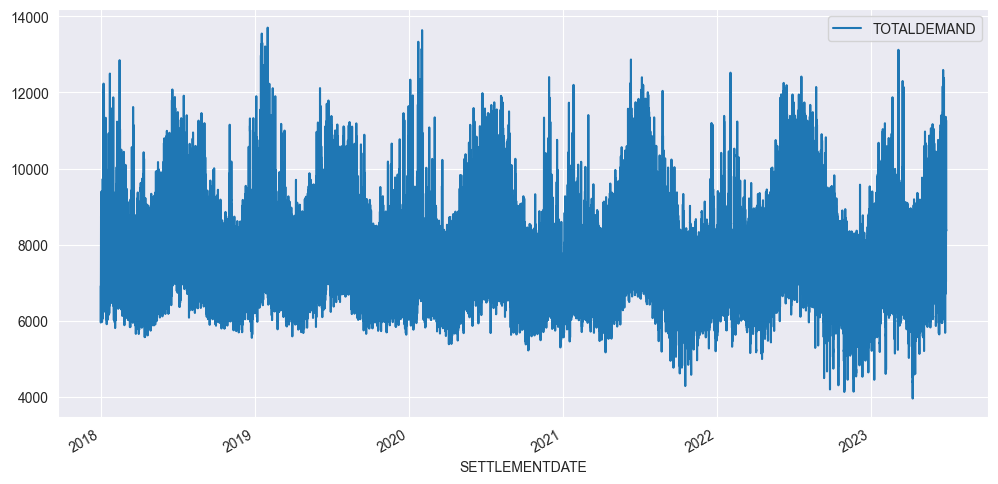

In [71]:
df.plot(x='SETTLEMENTDATE', y='TOTALDEMAND', figsize=(12,6))

Bien ya tenemos la serie temporal ordenada en orden cronológico, ahora vamos a seleccionar la serie a predecir, en este caso, usaremos la columna `TOTALDEMAND` como variable objetivo.

In [72]:
data_series = df['TOTALDEMAND'].values
data_series[:10]

array([6912.25, 6745.63, 6466.06, 6279.8 , 6177.31, 6050.43, 6032.48,
       5968.5 , 5953.75, 5962.18])

Ahora tenemos que preparar la serie para un problema supervisado, para eso utilizaremos la técnica de ventana móvil para convertir la serie en un problema supervisado, donde cada muestra (X) será una ventana de 'n_steps' y la etiqueta (y) será el valor siguiene a esa ventana.

In [73]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        # Si se supera el final de la serie, se detiene
        if end_ix >= len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........